In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import tensorflow
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from tensorflow import keras
from tensorflow.keras import layers, Sequential, callbacks
from tensorflow.keras.layers import  Flatten, Dense, LSTM, Dropout
from tensorflow.keras.optimizers import SGD, Adam
import math
from sklearn.metrics import mean_squared_error


In [33]:
df = pd.read_csv('traffic.csv')
df.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [34]:
df['DateTime']=pd.to_datetime(df['DateTime'])
df['year'] = df['DateTime'].dt.year
df['month'] = df['DateTime'].dt.month
df['date_num'] = df['DateTime'].dt.day
df['hour'] = df['DateTime'].dt.hour
df['Day'] = df['DateTime'].dt.day_name()
df

,DateTime,Junction,Vehicles,ID,year,month,date_num,hour,Day
0,2015-11-01 00:00:00,1,15,20151101001,2015,11,1,0,Sunday
1,2015-11-01 01:00:00,1,13,20151101011,2015,11,1,1,Sunday
2,2015-11-01 02:00:00,1,10,20151101021,2015,11,1,2,Sunday
3,2015-11-01 03:00:00,1,7,20151101031,2015,11,1,3,Sunday
4,2015-11-01 04:00:00,1,9,20151101041,2015,11,1,4,Sunday
...,...,...,...,...,...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,20170630194,2017,6,30,19,Friday
48116,2017-06-30 20:00:00,4,30,20170630204,2017,6,30,20,Friday
48117,2017-06-30 21:00:00,4,16,20170630214,2017,6,30,21,Friday
48118,2017-06-30 22:00:00,4,22,20170630224,2017,6,30,22,Friday


<Axes: xlabel='Day', ylabel='Vehicles'>

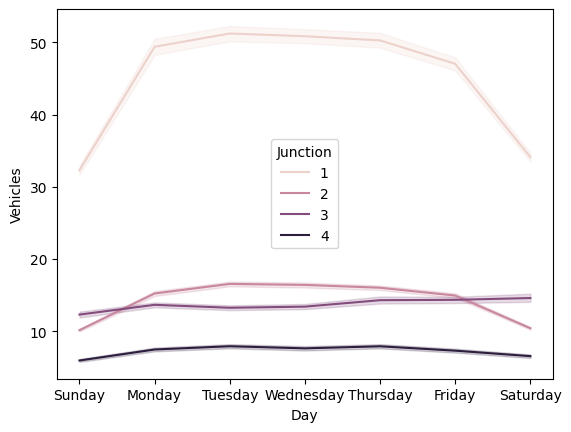

In [35]:
sns.lineplot(x=df['Day'],y="Vehicles",data=df,hue='Junction')

<Axes: xlabel='month', ylabel='Vehicles'>

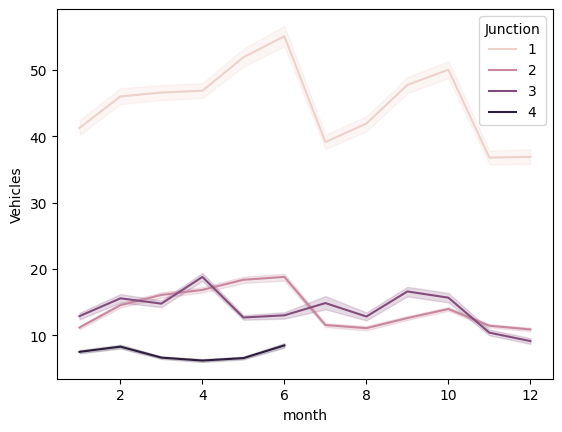

In [36]:
sns.lineplot(x=df['month'],y="Vehicles",data=df,hue='Junction')


<Axes: xlabel='year', ylabel='Vehicles'>

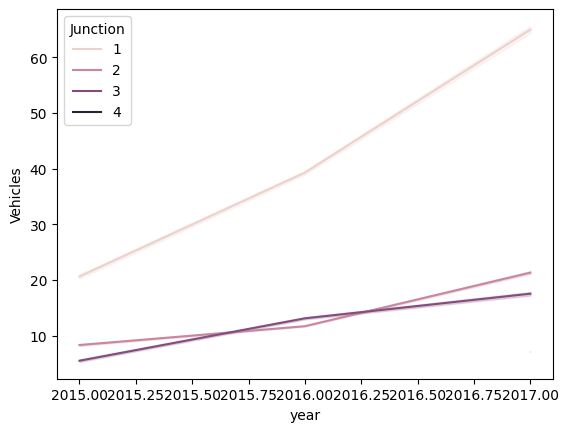

In [37]:
sns.lineplot(x=df['year'],y="Vehicles",data=df,hue='Junction')

<Axes: xlabel='date_num', ylabel='Vehicles'>

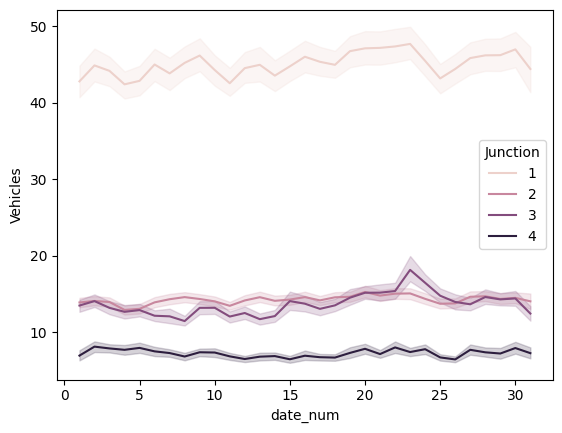

In [38]:
sns.lineplot(x=df['date_num'],y="Vehicles",data=df,hue='Junction')

In [39]:
#  separate the df according to 'junction'

junctions = df['Junction'].unique()
separated_dfs = {}
for junction in junctions:
  separated_dfs[junction] = df[df['Junction'] == junction]


separated_dfs[1]  # DataFrame for junction 1
separated_dfs[2]  # DataFrame for junction 2
separated_dfs[3]  # DataFrame for junction 3
separated_dfs[4]  # DataFrame for junction 4

,DateTime,Junction,Vehicles,ID,year,month,date_num,hour,Day
43776,2017-01-01 00:00:00,4,3,20170101004,2017,1,1,0,Sunday
43777,2017-01-01 01:00:00,4,1,20170101014,2017,1,1,1,Sunday
43778,2017-01-01 02:00:00,4,4,20170101024,2017,1,1,2,Sunday
43779,2017-01-01 03:00:00,4,4,20170101034,2017,1,1,3,Sunday
43780,2017-01-01 04:00:00,4,2,20170101044,2017,1,1,4,Sunday
...,...,...,...,...,...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,20170630194,2017,6,30,19,Friday
48116,2017-06-30 20:00:00,4,30,20170630204,2017,6,30,20,Friday
48117,2017-06-30 21:00:00,4,16,20170630214,2017,6,30,21,Friday
48118,2017-06-30 22:00:00,4,22,20170630224,2017,6,30,22,Friday


In [40]:
# keep the 'date_num', 'vehicles' only and drop other columns in all separated_dfs

for junction in junctions:
  separated_dfs[junction] = separated_dfs[junction][['date_num', 'Vehicles']]

separated_dfs[4]  # DataFrame for junction 4

,date_num,Vehicles
43776,1,3
43777,1,1
43778,1,4
43779,1,4
43780,1,2
...,...,...
48115,30,11
48116,30,30
48117,30,16
48118,30,22


In [41]:
#  apply MinMaxScaler on 'vehicles' of all the separated_dfs

for junction in junctions:
    scaler = MinMaxScaler()
    separated_dfs[junction]['Vehicles'] = scaler.fit_transform(separated_dfs[junction][['Vehicles']])

separated_dfs[4]  # DataFrame for junction 4

<ipython-input-41-35be22ef67a6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  separated_dfs[junction]['Vehicles'] = scaler.fit_transform(separated_dfs[junction][['Vehicles']])


,date_num,Vehicles
43776,1,0.057143
43777,1,0.000000
43778,1,0.085714
43779,1,0.085714
43780,1,0.028571
...,...,...
48115,30,0.285714
48116,30,0.828571
48117,30,0.428571
48118,30,0.600000


In [42]:
# Create sequences with sequence length of 7 for each separated_dfs

def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data)-seq_length-1):
        x = data[i:(i+seq_length)]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 7

for junction in junctions:
    # Assuming 'Vehicles' column is numeric and scaled
    data = separated_dfs[junction]['Vehicles'].values
    X, y = create_sequences(data, seq_length)

    # Store the sequences back into the separated_dfs dictionary
    separated_dfs[junction] = {'X': X, 'y':y}

In [43]:
#  split into training and test sets for time series forecast analysis

for junction in junctions:
    X = separated_dfs[junction]['X']
    y = separated_dfs[junction]['y']
    train_size = int(len(X) * 0.8)  # 80% for training
    X_train, X_test = X[0:train_size], X[train_size:len(X)]
    y_train, y_test = y[0:train_size], y[train_size:len(y)]

    # Store the train/test splits back into the separated_dfs dictionary
    separated_dfs[junction] = {'X_train': X_train, 'y_train': y_train,
                               'X_test': X_test, 'y_test': y_test}

In [45]:
#  Build LSTM model and train data of all the separated_dfs

from tensorflow.keras.callbacks import EarlyStopping

for junction in junctions:
    X_train = separated_dfs[junction]['X_train']
    y_train = separated_dfs[junction]['y_train']
    X_test = separated_dfs[junction]['X_test']
    y_test = separated_dfs[junction]['y_test']

    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1), return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(50, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1))

    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='mse')

    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2, callbacks=[early_stopping], verbose=1)

    separated_dfs[junction]['model'] = model
    separated_dfs[junction]['history'] = history

Epoch 1/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - loss: 0.0159 - val_loss: 0.0122
Epoch 2/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0053 - val_loss: 0.0064
Epoch 3/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0033 - val_loss: 0.0057
Epoch 4/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0029 - val_loss: 0.0043
Epoch 5/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0025 - val_loss: 0.0034
Epoch 6/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0023 - val_loss: 0.0036
Epoch 7/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0021 - val_loss: 0.0038
Epoch 8/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0019 - val_loss: 0.0030
Epoch 9/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0018 - val_loss: 0.0026
Epoch 10/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0017 - val_loss: 0.0027
Epoch 11/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0016 - val_loss: 0.0024
Epoch 12/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 

In [47]:
#  model summary

separated_dfs[4]['model'].summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                        │ (None, 7, 50)               │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 7, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 91,955 (359.20 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 61,304 (239.47 KB)

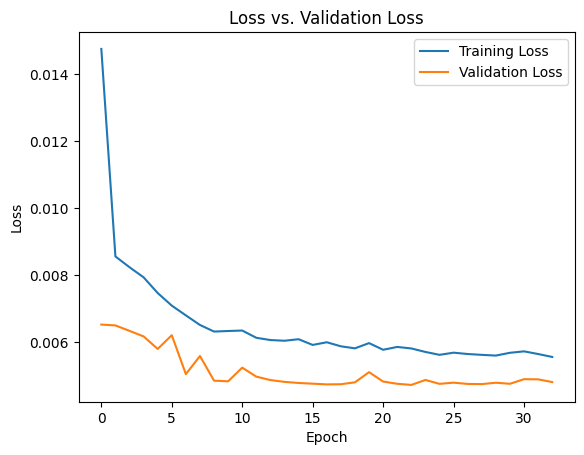

In [48]:
# Visualize Loss vs val_loss for one model

history = separated_dfs[4]['history']

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Validation Loss')
plt.legend()
plt.show()

92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
Junction 1:
Mean Squared Error (MSE): 0.0025186587240150146
Root Mean Squared Error (RMSE): 0.05018624038533884


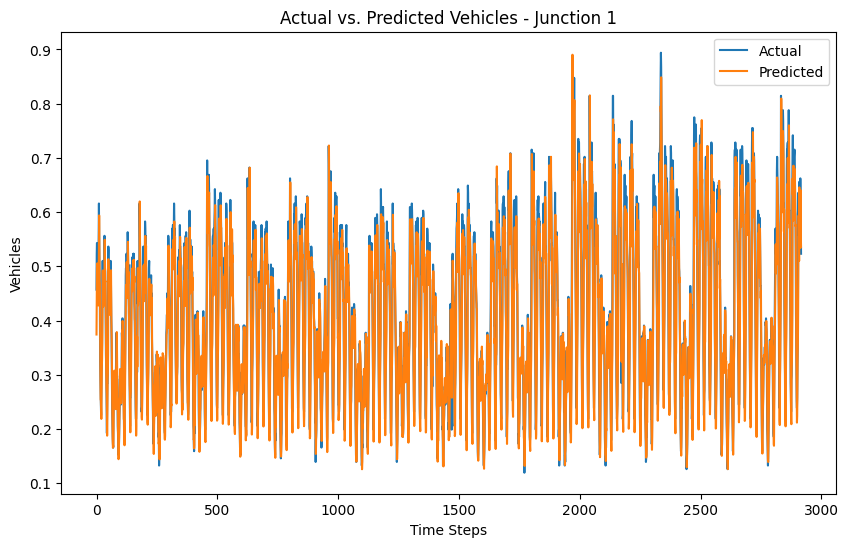

92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Junction 2:
Mean Squared Error (MSE): 0.00947917455608425
Root Mean Squared Error (RMSE): 0.09736105256253268


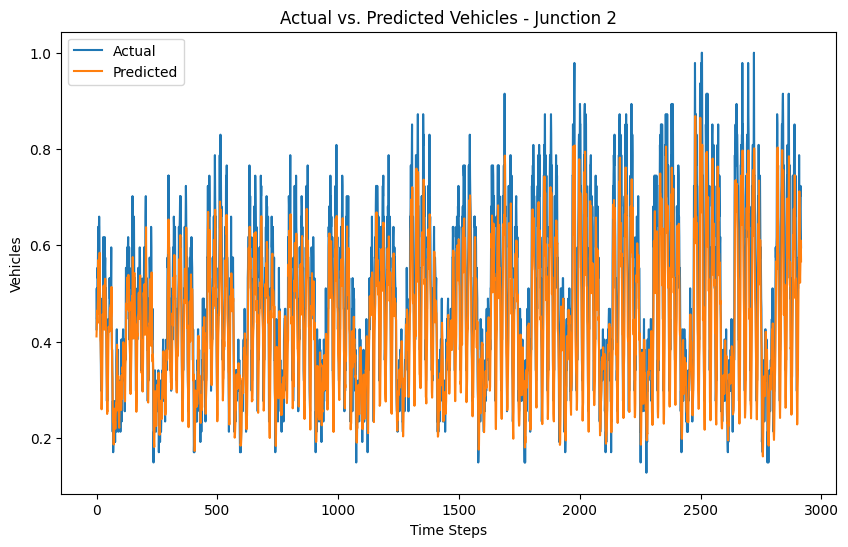

92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Junction 3:
Mean Squared Error (MSE): 0.0011815542304721423
Root Mean Squared Error (RMSE): 0.03437374332935158


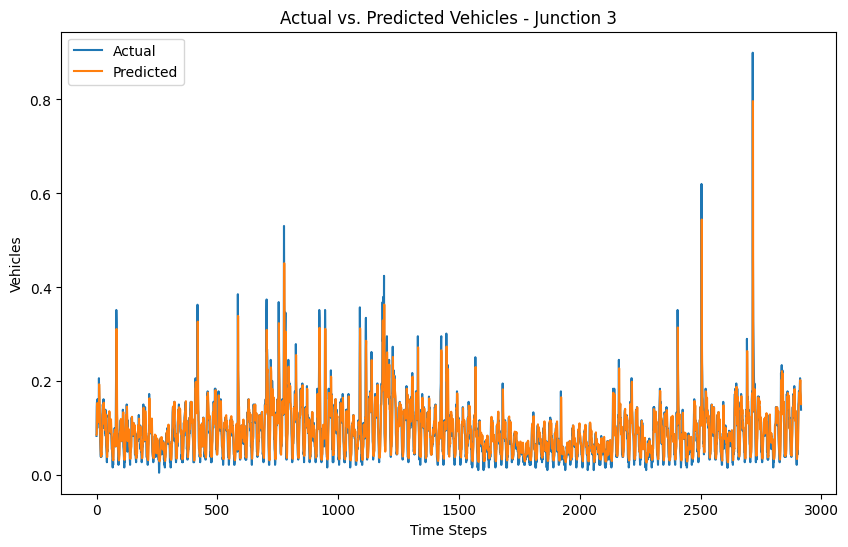

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
Junction 4:
Mean Squared Error (MSE): 0.007938402042785045
Root Mean Squared Error (RMSE): 0.08909771064839458


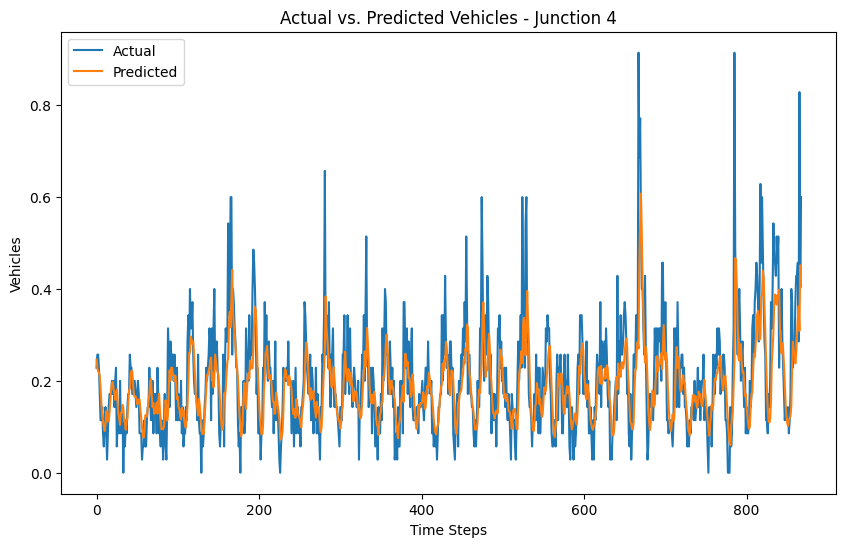

In [49]:

# Predict and evaluate for each separated_dfs
for junction in junctions:
    model = separated_dfs[junction]['model']
    X_test = separated_dfs[junction]['X_test']
    y_test = separated_dfs[junction]['y_test']

    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    rmse = math.sqrt(mse)

    print(f"Junction {junction}:")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")

    #Store results
    separated_dfs[junction]['y_pred'] = y_pred
    separated_dfs[junction]['mse'] = mse
    separated_dfs[junction]['rmse'] = rmse

    #Plot for each junction
    plt.figure(figsize=(10, 6))
    plt.plot(y_test, label='Actual')
    plt.plot(y_pred, label='Predicted')
    plt.xlabel('Time Steps')
    plt.ylabel('Vehicles')
    plt.title(f'Actual vs. Predicted Vehicles - Junction {junction}')
    plt.legend()
    plt.show()